In [3]:
import googlemaps
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests

In [5]:
pd.options.display.max_rows = 9999

In [4]:
df7= pd.read_excel('Office_Space_transform.xlsx', sheet_name='Bangalore_transformed')
df57= pd.read_excel('Office_Space_transform.xlsx', sheet_name='Hyderabad_transformed')

# Data Analysis 

###  Number of Coworking Spaces in Bangalore

In [8]:
len(df7)

346

###  Number of Coworking Spaces in Hyderabad

In [10]:
len(df57)

207

In [11]:

def Plot_Distribution(df):
    area_counts = df['Area Name'].value_counts()
    filtered_area_counts= area_counts[area_counts>=5]
    fig,ax=plt.subplots(figsize=(10, 10))
    
    filtered_area_counts.plot(kind='bar', color='skyblue',)
    ax.set_title('Number of Spaces in Top Localities')
    ax.set_xlabel('Area')
    ax.set_ylabel('Spaces')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right')
        

    

### Distribution of Spaces in Top Localities in Bangalore

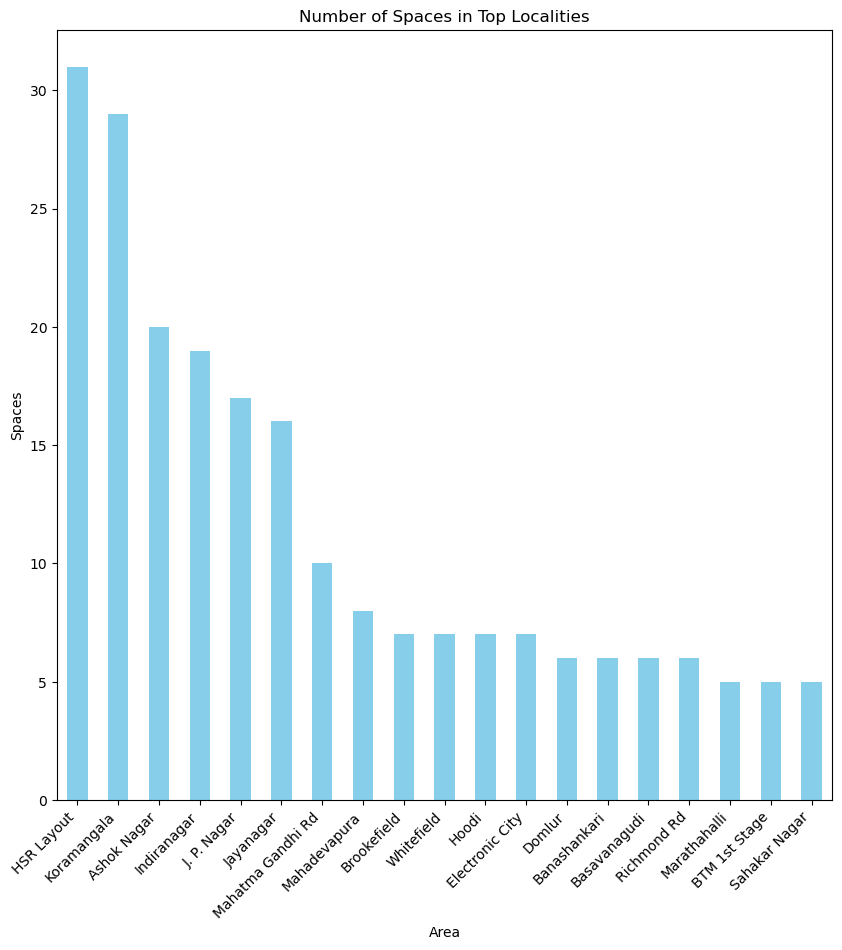

In [13]:
Plot_Distribution(df7)


### Distribution of Spaces in Top Localities in Hyderabad

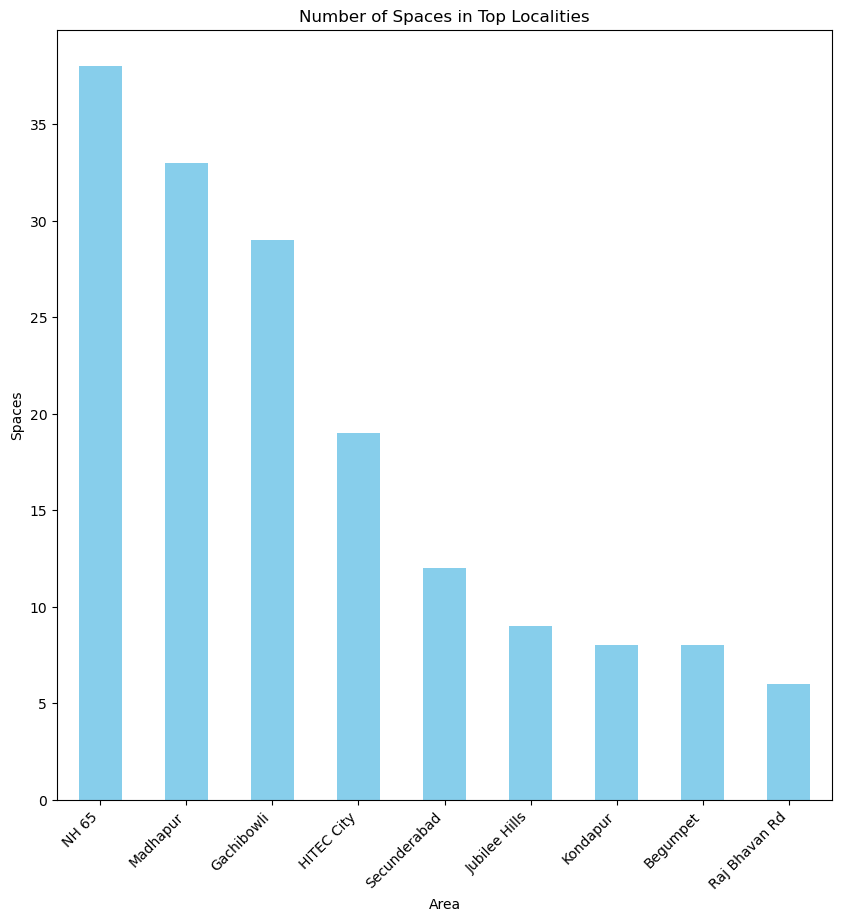

In [15]:
Plot_Distribution(df57)

In [16]:
def Plot_Price_Distribution(df):
    fig,ax=plt.subplots(figsize=(10, 10))
    area_counts = df['Area Name'].value_counts()
    areas_to_keep = area_counts[area_counts >= 5].index
    df_filtered = df[df['Area Name'].isin(areas_to_keep)]
    avg_price_per_area = df_filtered.groupby('Area Name')['Price/Seat'].mean()

    avg_price_per_area.plot(kind='bar', color='skyblue')
    ax.set_title('Average Price/Seat per Locality')
    ax.set_xlabel('Area')
    ax.set_ylabel('Spaces')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right')
    plt.show()

### Avg Price/Seat in Top Localities in Bangalore

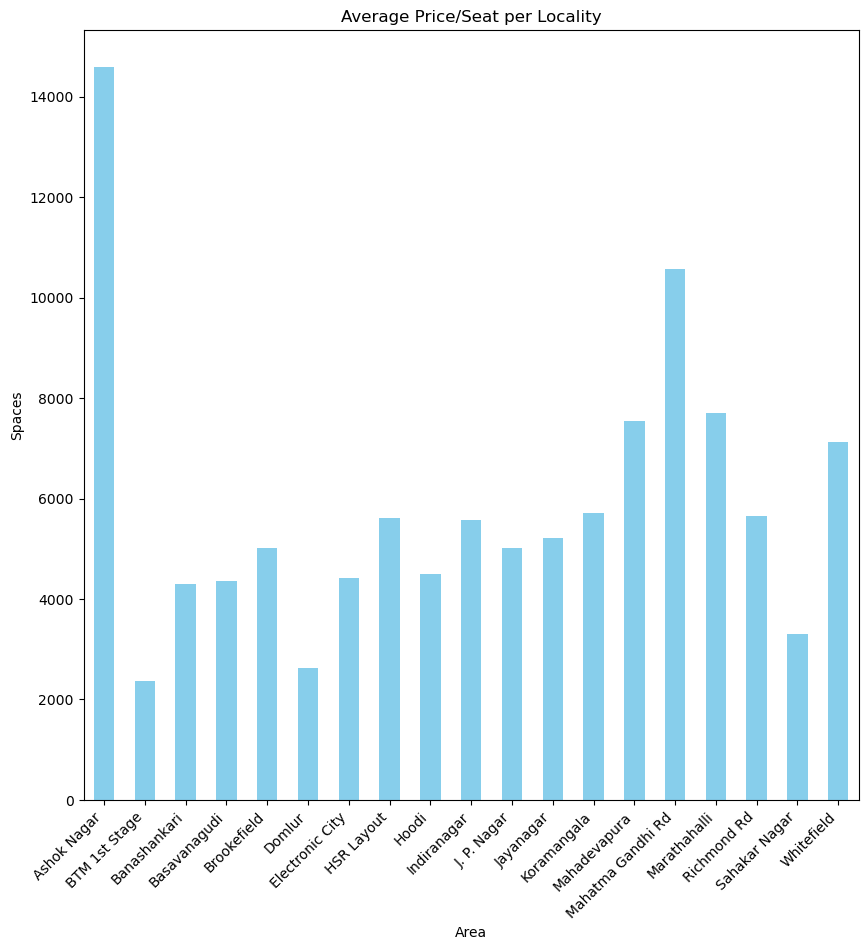

In [18]:
Plot_Price_Distribution(df7)

### Avg Price/Seat in Top Localities in Hyderabad

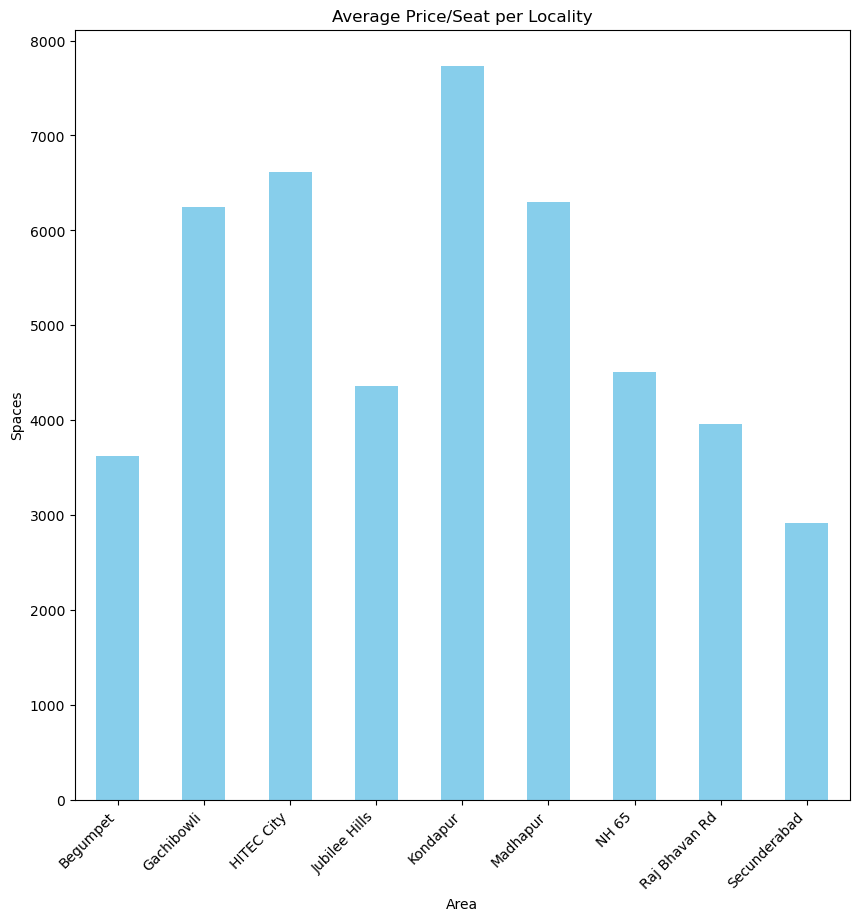

In [20]:
Plot_Price_Distribution(df57)

In [21]:
def Plot_Price_Distribution2(df):
    fig,ax=plt.subplots(figsize=(10, 10))
    area_counts = df['Area Name'].value_counts()
    areas_to_keep = area_counts[area_counts >= 5].index
    df_filtered = df[df['Area Name'].isin(areas_to_keep)]
    avg_price_per_area = df_filtered.groupby('Area Name')['Price/Sqft'].mean()

    avg_price_per_area.plot(kind='bar', color='skyblue')
    ax.set_title('Average Price/Sqft per Locality')
    ax.set_xlabel('Area')
    ax.set_ylabel('Spaces')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right')
    plt.show()

### Avg Price/Sqft in Top Localities in Bangalore

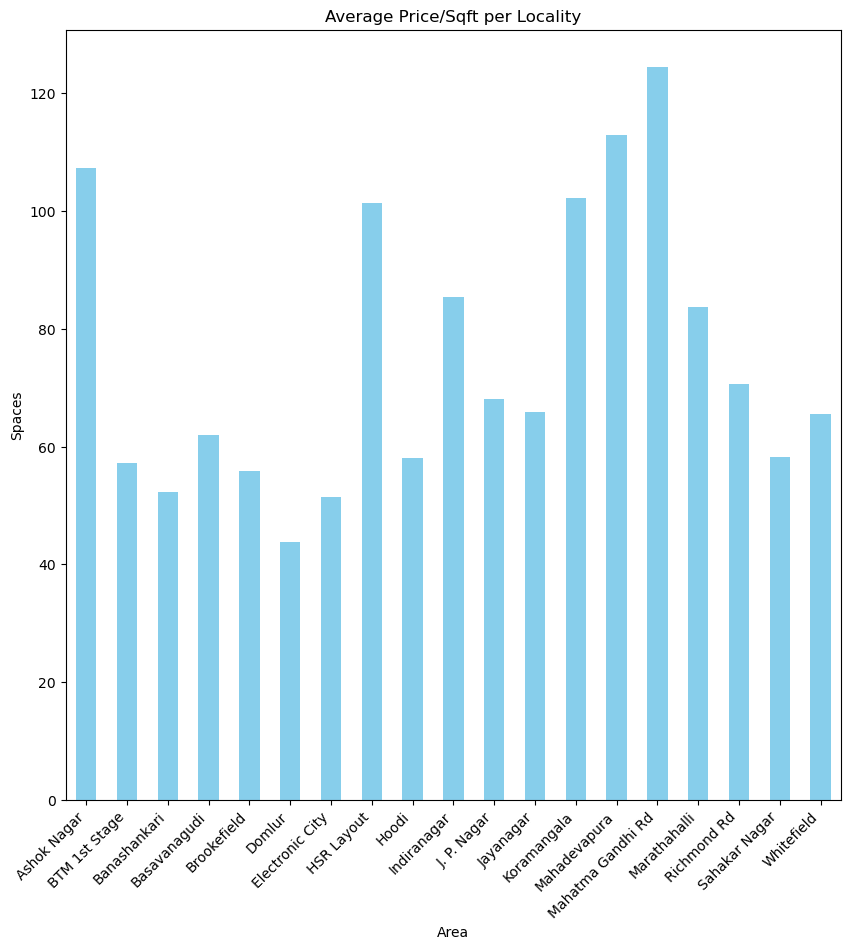

In [22]:
Plot_Price_Distribution2(df7)

### Avg Price/Sqft in Top Localities in Hyderabad

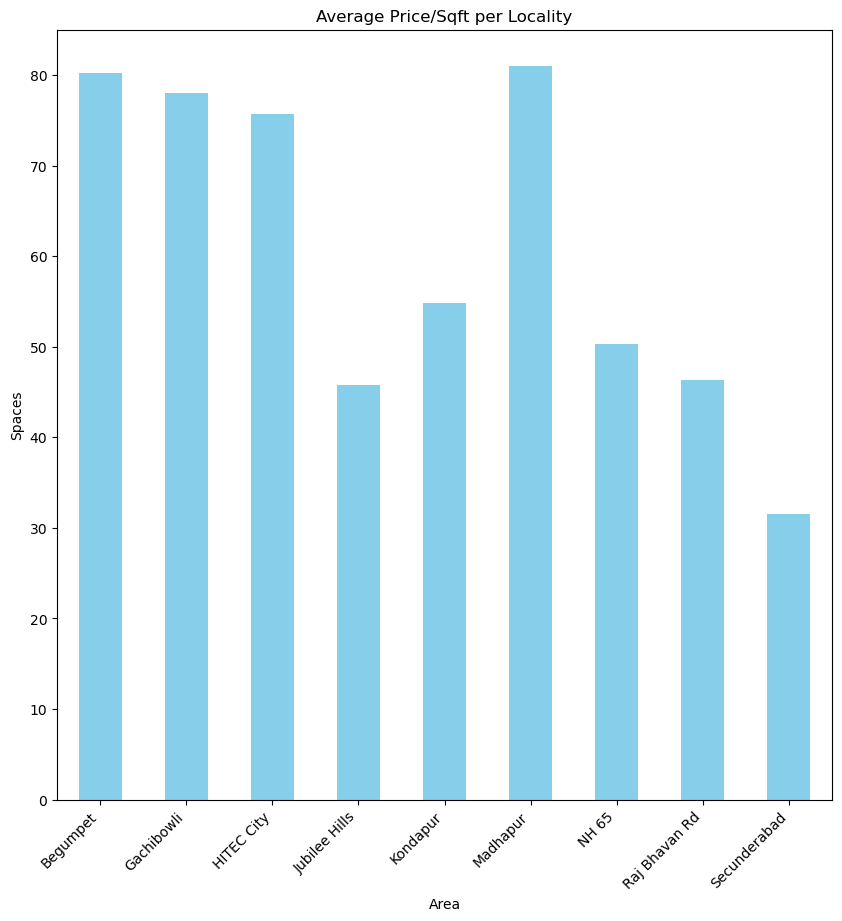

In [23]:
Plot_Price_Distribution2(df57)

### Statistical data on coworking space prices in Bangalore

In [25]:
df7["Price"].describe().apply(lambda x: format(x, 'f'))

count        346.000000
mean      378690.881503
std       602067.600641
min         9800.000000
25%        75000.000000
50%       177500.000000
75%       406375.000000
max      5700000.000000
Name: Price, dtype: object

### Statistical data on coworking space prices in Hyderabad

In [27]:
df57["Price"].describe().apply(lambda x: format(x, 'f'))

count        207.000000
mean      308247.342995
std       408980.104148
min         9000.000000
25%        80000.000000
50%       150000.000000
75%       350000.000000
max      2100000.000000
Name: Price, dtype: object

### Average Price per Seat in Bangalore

In [29]:
np.mean(df7['Price/Seat'])

6132.336232150358

### Average Price per Seat in Hyderabad

In [31]:
np.mean(df57['Price/Seat'])

5798.9989931996715

### Average Price/Sqft per Seat in Bangalore

In [33]:
np.mean(df7['Price/Sqft'])

78.65189050464868

### Average Price/Sqft per Seat in Hyderabad

In [35]:
np.mean(df57['Price/Sqft'])

63.696108900011396

### Average Lockin Period in Bangalore

In [37]:
filtered_df= df7.dropna(subset=['Lockin'])
np.mean(filtered_df['Lockin']).round()

2.0

### Average Lockin Period in Hyderabad

In [39]:
filtered_df= df57.dropna(subset=['Lockin'])
np.mean(filtered_df['Lockin']).round()

2.0

In [40]:
def Plot_distance(df):
    filtered_df = df[~df['Distance From Metro'].isin(['NA'])]
    new_filtered_df=filtered_df[(filtered_df['Distance From Metro']<2000)]
    sorted_df = new_filtered_df.sort_values(by='Distance From Metro',ascending=True)
    sorted_df.reset_index(drop=True, inplace=True)
    labels=['Spaces with distance from the metro within 2km','Spaces with distance from the metro more than 2km']
    sizes=[len(sorted_df),(len(df)-len(sorted_df))]
    explode=[0,0.1]
    fig, ax = plt.subplots()
    ax.pie(sizes,explode=explode, labels=labels,autopct='%1.1f%%');
    return sorted_df

### Pie chart illustrating the distribution of Bangalore Office spaces based on their distance from metro stations

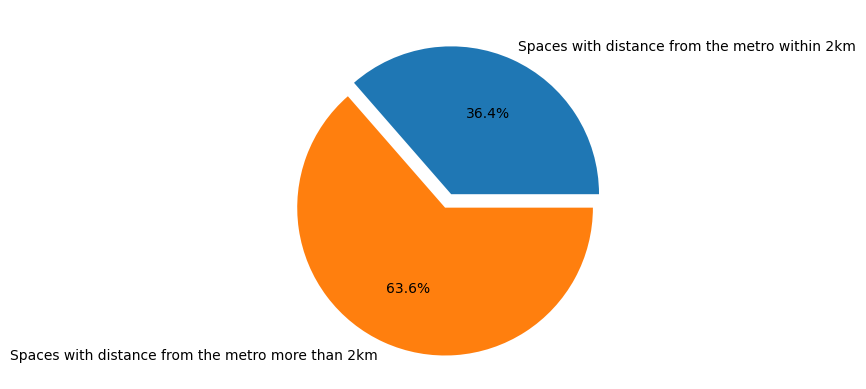

In [42]:
sorted_df=Plot_distance(df7)
#sorted_df

### Pie chart illustrating the distribution of Hyderabad Office spaces based on their distance from metro stations

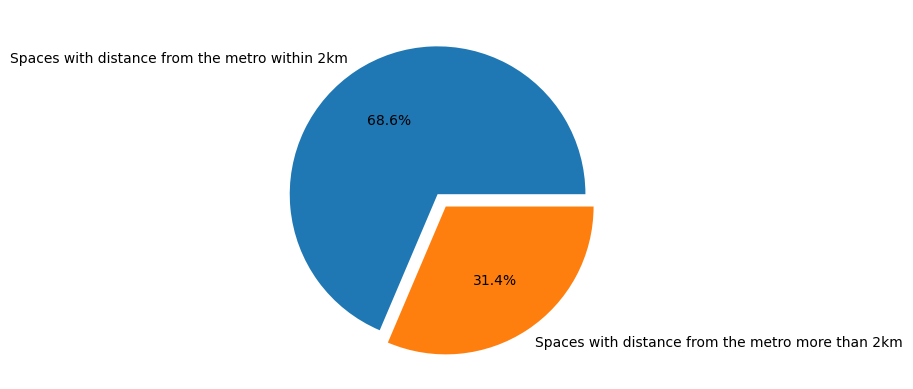

In [44]:
sorted_df=Plot_distance(df57)
#sorted_df

In [45]:
def FindSpace(df):
    Area=input("Enter the name of the Area").lower()
    price=int(input("Enter your budget for price per seat "))
    seats=int(input("Enter the Minimum number of seats"))
    Area2=int(input("Enter the Minimum area dimensions"))
    
    new_filtered_df=df[df['Area Name'].str.lower()==Area]
    new_new_filtered_df=new_filtered_df[new_filtered_df['Seats']>=seats]
    new_new_new_filtered_df=new_new_filtered_df[new_new_filtered_df['Price/Seat']<=price]
    new4_filtered=new_new_new_filtered_df[new_new_new_filtered_df['Area']>=Area2]
    if len(new4_filtered)==0:
        print('No Spaces in the specified condition')
        pass
    else:
        return new4_filtered

### Finding a Space in Bangalore based on Preferences

In [47]:
fdf=FindSpace(df7)
fdf

Enter the name of the Area hsr layout
Enter your budget for price per seat  10000
Enter the Minimum number of seats 20
Enter the Minimum area dimensions 4000


,Location,Building,Area,Cabins,Seats,Lockin,Price,Price/Seat,Price/Sqft,Area/Seat,Area Name,Nearby Metro Station,Distance From Metro
49,Sector 1st HSR Layout,NaN,4000,6,40,2.0,300000,7500.000000,75.0,100.000000,HSR Layout,NaN,NaN
66,Sector 4 HSR Layout,EBC Space 5,6900,15,195,2.0,1050000,5384.615385,152.0,35.384615,HSR Layout,NaN,NaN
108,Sector 1st HSR Layout,NaN,12000,10,203,2.0,1500000,7389.162562,125.0,59.113300,HSR Layout,NaN,NaN
113,Hsr Layout,NaN,4500,4,60,2.0,600000,10000.000000,133.0,75.000000,HSR Layout,NaN,NaN
116,Sector 3 HSR Layout,NaN,16000,4,200,2.0,1200000,6000.000000,75.0,80.000000,HSR Layout,NaN,NaN
128,Sector 6 HSR Layout,JS Tower,36219,4,500,3.0,2890000,5780.000000,80.0,72.438000,HSR Layout,NaN,NaN
196,Sector 7 HSR Layout,NaN,12000,1,200,1.0,1000000,5000.000000,83.0,60.000000,HSR Layout,NaN,NaN
206,Sector 1st HSR Layout,NaN,11500,3,150,1.0,600000,4000.000000,52.0,76.666667,HSR Layout,NaN,NaN
211,Sector 2 HSR Layout,NaN,6400,4,100,NaN,750000,7500.000000,117.0,64.000000,HSR Layout,NaN,NaN
302,Agara Village,CRE Vistar,12000,3,440,1.0,1320000,3000.000000,110.0,27.272727,HSR Layout,NaN,NaN


In [48]:
fdf=FindSpace(df57)
fdf

Enter the name of the Area Hitec City
Enter your budget for price per seat  10000
Enter the Minimum number of seats 20
Enter the Minimum area dimensions 4000


,Location,Building,Area,Cabins,Seats,Lockin,Price,Price/Seat,Price/Sqft,Area/Seat,Area Name,Nearby Metro Station,Distance From Metro
3,"HUDA Techno Enclave, Hitech City",NaN,6500,2,100,NaN,700000,7000.000000,107.692308,65.000000,HITEC City,Raidurg,671.0
12,"HUDA Techno Enclave, Hitech City",NaN,6500,2,100,3.0,700000,7000.000000,108.000000,65.000000,HITEC City,Raidurg,671.0
35,Hitech City,NaN,5400,3,100,2.0,243000,2430.000000,45.000000,54.000000,HITEC City,Raidurg,671.0
37,Hitech City,NaN,20500,10,250,2.0,1250000,5000.000000,61.000000,82.000000,HITEC City,Raidurg,671.0
68,Hitech City,NaN,8500,7,94,3.0,680000,7234.042553,80.000000,90.425532,HITEC City,Raidurg,671.0
106,Hitech City,Cyber Gateway,8225,8,84,2.0,535000,6369.047619,65.000000,97.916667,HITEC City,Raidurg,671.0
186,Hitech City,NaN,22500,10,36,1.0,324000,9000.000000,14.000000,625.000000,HITEC City,Raidurg,671.0
201,Hitech City,NaN,4140,4,40,3.0,310500,7762.500000,75.000000,103.500000,HITEC City,Raidurg,671.0


# Price Prediction Using Machine Learning

### Bangalore

In [50]:
df9=df7.drop(columns=['Location','Building','Lockin','Nearby Metro Station','Distance From Metro','Price/Seat','Area/Seat','Price/Sqft'])

In [51]:
area_counts = df9['Area Name'].value_counts()
filtered_area_counts= area_counts[area_counts<5]
df9['Area Name'] = df9['Area Name'].apply(lambda x: 'other' if x in filtered_area_counts else x)

In [52]:
df9 = df9[df9['Area Name'] != 'other']
df9_ML=pd.get_dummies(df9, columns=['Area Name'])


In [53]:
df9_ML_X=df9_ML.drop(columns=['Price'])
df9_ML_Y=df9_ML.Price

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df9_ML_X, df9_ML_Y,test_size=0.2, random_state=10)

In [55]:
from sklearn.linear_model import LinearRegression
ML_Model= LinearRegression()
ML_Model.fit(X_train,y_train)
ML_Model.score(X_test,y_test)

0.6251627753926897

In [56]:
def predict_price(Area_Name,Area,cabin,seat):    
    loc_index = np.where(df9_ML_X.columns==f'Area Name_{Area_Name}')[0][0]

    x = np.zeros(len(df9_ML_X.columns))
    
    x[0] = Area
    x[1] = cabin
    x[2] = seat
    if loc_index >= 0:
        x[loc_index] = 1
    return ML_Model.predict([x])[0]

In [57]:
predict_price('Koramangala',5000,10,100)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


544760.4624299649

### Hyderabad

In [60]:
df59=df57.drop(columns=['Location','Building','Lockin','Nearby Metro Station','Distance From Metro','Price/Seat','Area/Seat','Price/Sqft'])

In [61]:
area_counts = df59['Area Name'].value_counts()
filtered_area_counts= area_counts[area_counts<=1]
df59['Area Name'] = df59['Area Name'].apply(lambda x: 'other' if x in filtered_area_counts else x)

In [62]:
df59 = df59[df59['Area Name'] != 'other']
df59_ML=pd.get_dummies(df59, columns=['Area Name'])

In [63]:
df59_ML_X=df59_ML.drop(columns=['Price'])
df59_ML_Y=df59_ML.Price

In [65]:
from sklearn.model_selection import train_test_split
X_trai, X_tes, y_trai, y_tes = train_test_split(df59_ML_X, df59_ML_Y,test_size=0.2, random_state=10)

In [66]:
from sklearn.linear_model import LinearRegression
ML_Model2= LinearRegression()
ML_Model2.fit(X_trai,y_trai)
ML_Model2.score(X_tes,y_tes)

0.8600249512268997

In [67]:
def predict_price_hyd(Area_Name,Area,cabin,seat):    
    loc_index = np.where(df59_ML_X.columns==f'Area Name_{Area_Name}')[0][0]

    x = np.zeros(len(df59_ML_X.columns))
    
    x[0] = Area
    x[1] = cabin
    x[2] = seat
    if loc_index >= 0:
        x[loc_index] = 1
    return ML_Model2.predict([x])[0]

In [68]:
predict_price_hyd('HITEC City',10000,10,200)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


712977.1665998886

# Analysis of office spaces with no seats or cabins criteria

## Bangalore

### Data Cleaning

In [72]:
df_blr= pd.read_excel('Office_Spaces.xlsx', sheet_name='Magicbricks Bangalore')
df_hyd= pd.read_excel('Office_Spaces.xlsx', sheet_name='Magicbricks Hyderabad')

In [73]:
df_blr1 = df_blr[df_blr['Seats'].isna()]
df_blr1=df_blr1.drop(columns=['Building','Lockin','Price/Seat','Cabins','Seats'])
df_blr1.rename(columns={'Area(sqft)': 'Area'}, inplace=True)
df_blr1=df_blr1.dropna(subset=['Price','Location','Area'])

In [74]:
df_blr1['Area'] = pd.to_numeric(df_blr1['Area'], errors='coerce')
df_blr2= df_blr1.dropna(subset=['Area'])

In [75]:
df_blr2=df_blr2[~(df_blr2['Area']>100000)]
df_blr2=df_blr2[~(df_blr2['Area']<1000)]
df_blr2=df_blr2[~(df_blr2['Price']>10000000)]
df_blr2=df_blr2[~(df_blr2['Price']<10000)]
df_blr2=df_blr2[~(df_blr2['Price/Sqft']>400)]
df_blr2=df_blr2[~(df_blr2['Price/Sqft']<20)]

### Data Analysis

### Avg Area

In [77]:
np.mean(df_blr2['Area'])

3690.4463601532566

### Avg Price

In [79]:
np.mean(df_blr2['Price'])

227062.75

### Avg Price/Seat

In [81]:
np.mean(df_blr2['Price/Sqft'])

59.25526819923372

In [82]:
df_blr3=df_blr2.copy()
df_blr3.reset_index(drop=True, inplace=True)
Top_Locations=['Koramangala','hsr layout','Indiranagar','Rajajinagar','Malleshwaram','Whitefield','RR Nagar','Marathahalli','J P Nagar','Jayanagar','BTM Layout','Kalyan Nagar','Basavanagudi','Bannerghatta','Banashankari']
for i in range(len(df_blr3)):
    for j in Top_Locations:
        if j.lower() in df_blr3.loc[i,'Location'].lower():
            df_blr3.loc[i,'Location']=j
            break
        else:
            continue

area_counts = df_blr3['Location'].value_counts()
filtered_area_counts= area_counts[area_counts<10]
df_blr3['Location'] = df_blr3['Location'].apply(lambda x: 'other' if x in filtered_area_counts else x)

### Number of Spaces in Top Localities

In [84]:
df_blr3 = df_blr3[df_blr3['Location'] != 'other']

In [85]:
def Plot_Distribution2(df,count):
    area_counts = df['Location'].value_counts()
    filtered_area_counts= area_counts[area_counts>=count]
    fig,ax=plt.subplots(figsize=(10, 10))
    
    filtered_area_counts.plot(kind='bar', color='skyblue',)
    ax.set_title('Number of Spaces in Top Localities')
    ax.set_xlabel('Area')
    ax.set_ylabel('Spaces')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right')

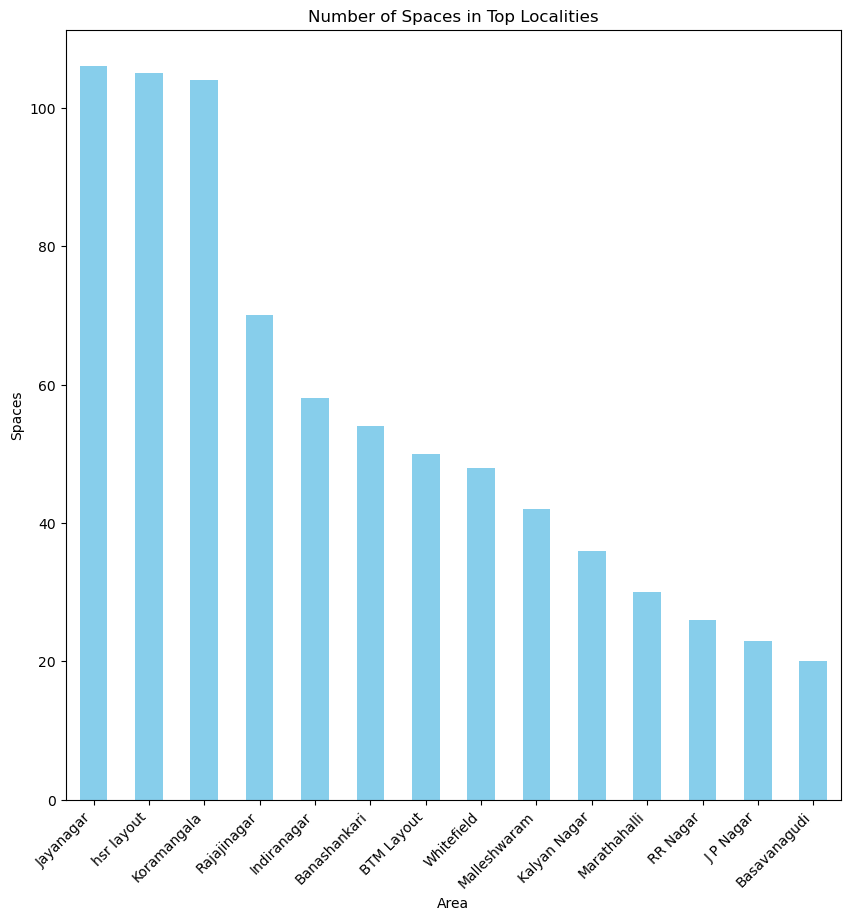

In [86]:
Plot_Distribution2(df_blr3,20)

### Avg Price/Sqft in Top Localities

In [88]:
def Plot_Price_Distribution2(df,count):
    fig,ax=plt.subplots(figsize=(10, 10))
    area_counts = df['Location'].value_counts()
    areas_to_keep = area_counts[area_counts >= count].index
    df_filtered = df[df['Location'].isin(areas_to_keep)]
    avg_price_per_area = df_filtered.groupby('Location')['Price/Sqft'].mean()

    avg_price_per_area.plot(kind='bar', color='skyblue')
    ax.set_title('Average Price/Sqft per Locality')
    ax.set_xlabel('Area')
    ax.set_ylabel('Spaces')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=45, ha='right')
    plt.show()

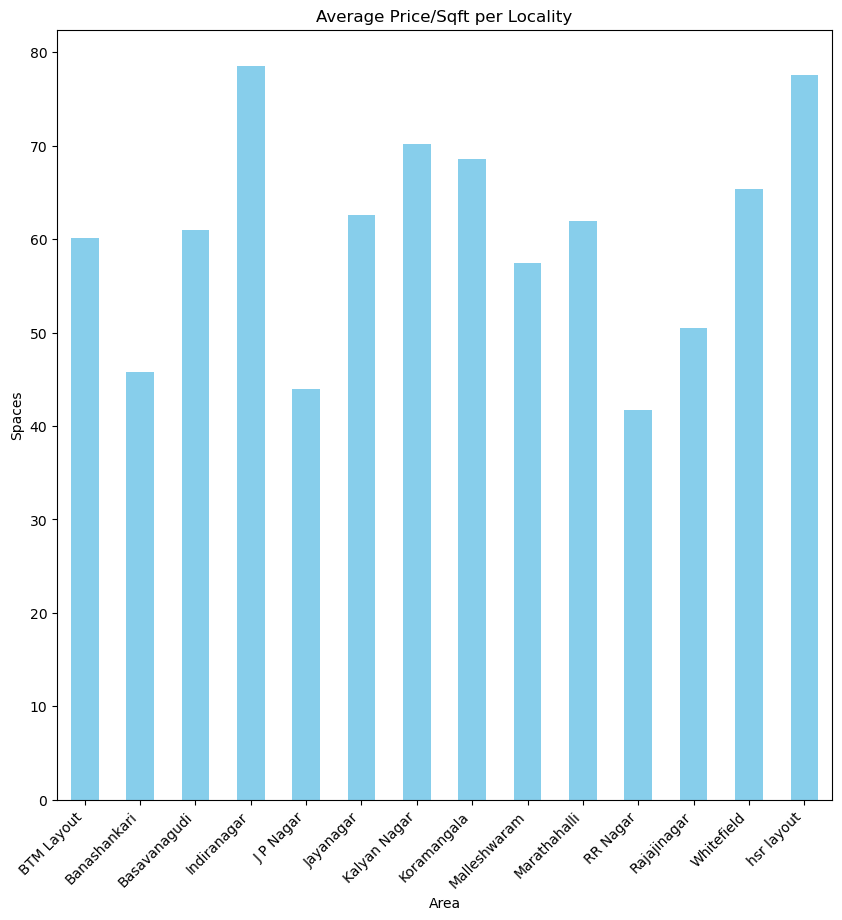

In [89]:
Plot_Price_Distribution2(df_blr3,20)

## ML Model to predict price of a space

In [91]:

df_blr3_ML=pd.get_dummies(df_blr3, columns=['Location'])

In [92]:
df_blr3_ML=df_blr3_ML.drop(columns=['Price/Sqft'])

In [93]:
df_blr3_ML_X=df_blr3_ML.drop(columns=['Price'])
df_blr3_ML_Y=df_blr3_ML.Price

In [94]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(df_blr3_ML_X, df_blr3_ML_Y,test_size=0.2, random_state=42)

In [95]:
from sklearn.linear_model import LinearRegression
ML_Model3= LinearRegression()
ML_Model3.fit(X_train2,y_train2)
ML_Model3.score(X_test2,y_test2)

0.7307222386710396

In [96]:
def predict_price_blr2(Area_Name,Area):    
    loc_index = np.where(df_blr3_ML_X.columns==f'Location_{Area_Name}')[0][0]

    x = np.zeros(len(df_blr3_ML_X.columns))
    
    x[0] = Area
    if loc_index >= 0:
        x[loc_index] = 1
    return ML_Model3.predict([x])[0]

In [97]:
predict_price_blr2('Koramangala',10000)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


700201.7775188688

## Hyderabad

### Data Cleaning

In [99]:
df_hyd1 = df_hyd[df_hyd['Seats'].isna()]
df_hyd1=df_hyd1.drop(columns=['Building','Lockin','Price/Seat','Cabins','Seats'])
df_hyd1.rename(columns={'Area(sqft)': 'Area'}, inplace=True)
df_hyd1=df_hyd1.dropna(subset=['Price','Location','Area'])

In [100]:
df_hyd1['Area'] = pd.to_numeric(df_hyd1['Area'], errors='coerce')
df_hyd2= df_hyd1.dropna(subset=['Area'])

In [101]:
df_hyd2=df_hyd2[~(df_hyd2['Area']>100000)]
df_hyd2=df_hyd2[~(df_hyd2['Area']<1000)]
df_hyd2=df_hyd2[~(df_hyd2['Price']>10000000)]
df_hyd2=df_hyd2[~(df_hyd2['Price']<10000)]
df_hyd2=df_hyd2[~(df_hyd2['Price/Sqft']>400)]
df_hyd2=df_hyd2[~(df_hyd2['Price/Sqft']<20)]

### Data Analysis

### Avg Area

In [103]:
np.mean(df_hyd2['Area'])

4450.678867403315

### Avg Price

In [105]:
np.mean(df_hyd2['Price'])

219013.00276243093

### Avg Price/Sqft

In [108]:
np.mean(df_hyd2['Price/Sqft'])

48.77209944751381

In [109]:
area_counts = df_hyd2['Location'].value_counts()
filtered_area_counts= area_counts[area_counts<10]
df_hyd2['Location'] = df_hyd2['Location'].apply(lambda x: 'other' if x in filtered_area_counts else x)

In [110]:
df_hyd2 = df_hyd2[df_hyd2['Location'] != 'other']

### Number of Spaces in Top Localities

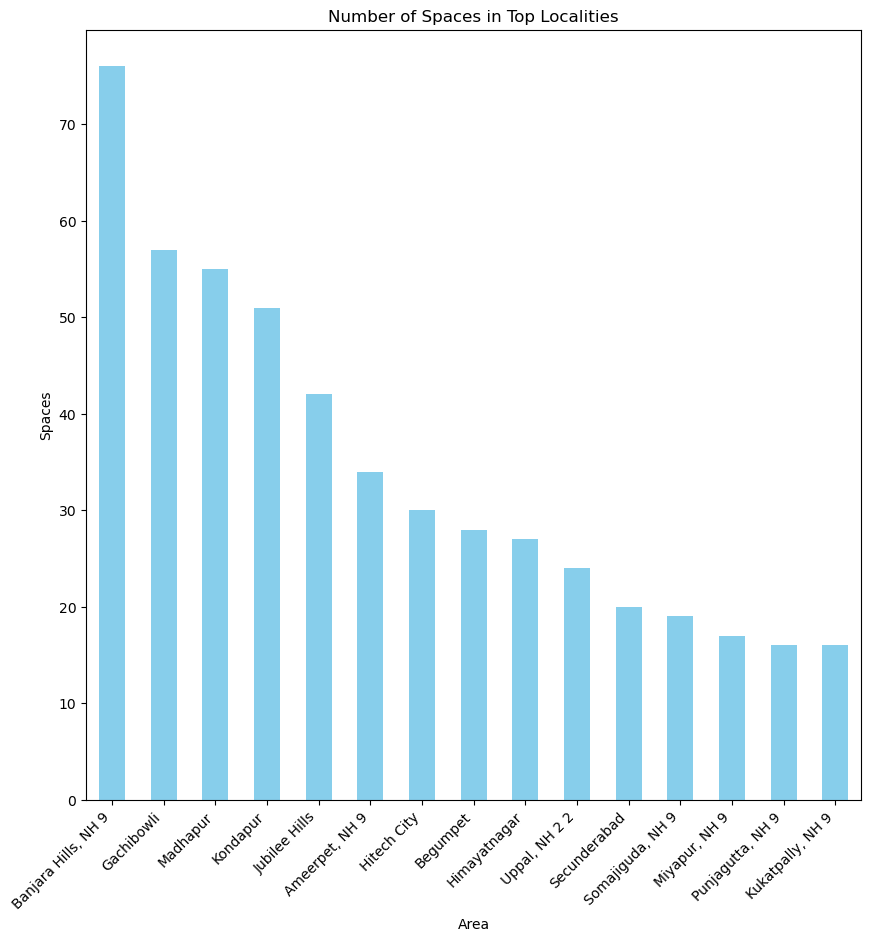

In [112]:
Plot_Distribution2(df_hyd2,15)

### Avg Price/Sqft in Top Localities

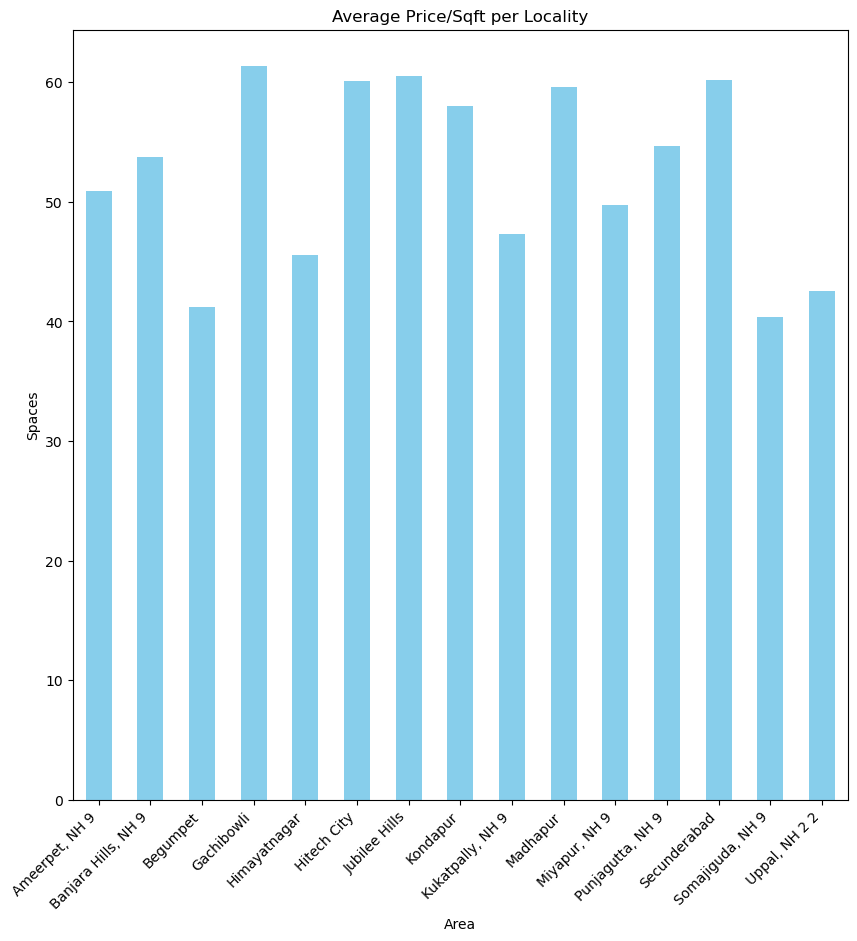

In [114]:
Plot_Price_Distribution2(df_hyd2,15)

## ML Model to predict price of a space

In [116]:
df_hyd2_ML=pd.get_dummies(df_hyd2, columns=['Location'])

In [117]:
df_hyd2_ML=df_hyd2_ML.drop(columns=['Price/Sqft'])

In [118]:
df_hyd2_ML_X=df_hyd2_ML.drop(columns=['Price'])
df_hyd2_ML_Y=df_hyd2_ML.Price

In [119]:
from sklearn.model_selection import train_test_split
X_trai2, X_tes2, y_trai2, y_tes2 = train_test_split(df_hyd2_ML_X, df_hyd2_ML_Y,test_size=0.2, random_state=42)

In [120]:
from sklearn.linear_model import LinearRegression
ML_Model4= LinearRegression()
ML_Model4.fit(X_trai2,y_trai2)
ML_Model4.score(X_tes2,y_tes2)

0.8155893792417607

In [121]:
def predict_price_hyd2(Area_Name,Area):    
    loc_index = np.where(df_hyd2_ML_X.columns==f'Location_{Area_Name}')[0][0]

    x = np.zeros(len(df_hyd2_ML_X.columns))
    
    x[0] = Area
    if loc_index >= 0:
        x[loc_index] = 1
    return ML_Model4.predict([x])[0]

In [122]:
predict_price_hyd2('Hitech City',10000)

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


569992.239068774

## Upcoming Infra Projects in each city

### Bangalore

**Suburban Rail Project**: This project aims to improve connectivity within the city and its outskirts, facilitating easier commute for office workers. The project includes the development of four corridors covering a total distance of 148 km, expected to be operational by 2026​ 

**Whitefield and Electronic City Metro Extension**: The extension of the Namma Metro to Whitefield and Electronic City, both major IT hub, will ease the daily commute for thousands of tech professionals, reducing traffic congestion and travel time​

**Peripheral Ring Road (PRR)**: This project is intended to decongest the city's traffic by providing an alternate route for heavy vehicles, thereby reducing the load on city roads and improving overall travel times for office goers​

### Hyderabad

**Strategic Road Development Plan (SRDP) Phase-2**: GHMC has proposed 15 new projects, including the construction of flyovers, underpasses, and Road Over Bridges (RoBs). These projects aim to provide conflict-free traffic movement in busy corridors, significantly reducing commute times​

**Inter City Bus Terminal (ICBT) at Miyapur**: This state-of-the-art bus terminal will integrate facilities for passengers, public and private bus operators, and their staff. It includes bus bays, parking, dormitories, restaurants, and office spaces, enhancing the overall infrastructure for office commutes​ 

**ITIR Project**: The Information Technology Investment Region (ITIR) project will create a dedicated zone for IT and related industries, fostering a conducive environment for coworking spaces to thrive amidst a burgeoning tech community.​

## Occupancy Rate of Spaces in each city

### Bangalore

In 2023, the Indian city of Bengaluru had over 15 percent of vacant office spaces. Thereby, the vacancy rate tripled in comparison to the year 2019 when 4.8 percent of the total office space in the city were vacant.

### Hyderabad

In 2023, the vacancy rate of office spaces across the south Indian city of Hyderabad increased to 14.9 percent. Thereby, it was a decline from the previous year. In 2016, the vacancy rate had been at six percent.

# CONCLUSION

In conclusion, while Bangalore offers a greater number of coworking spaces compared to Hyderabad, the average cost per seat is significantly lower in Hyderabad. Additionally, many coworking spaces in Hyderabad are conveniently located near metro stations, reducing commute times and enhancing accessibility. This makes Hyderabad a highly suitable option for office spaces. This combination of affordability and convenience positions Hyderabad as a compelling choice for setting up office spaces.
